### **Imports**

In [1]:
import os
import cv2
import random as r
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **Helpers**

In [2]:
def breaker(num: int=50, char: str="*") -> None:
    print("\n" + num*char + "\n")


def get_image(path: str) -> np.ndarray:
    return cv2.cvtColor(src=cv2.imread(path, cv2.IMREAD_COLOR), code=cv2.COLOR_BGR2RGB)
    

def show_image(image: np.ndarray, cmap: str="gnuplot2", title: str=None) -> None:
    plt.figure()
    plt.imshow(image, cmap=cmap)
    plt.axis("off")
    plt.show()

    
TRAIN_BASE = "../input/paddy-disease-classification/train_images"
TEST_BASE  = "../input/paddy-disease-classification/test_images"

### **Random Train Image**

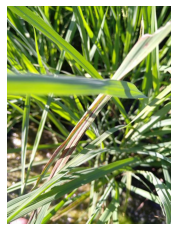

In [3]:
index_1 = r.randint(0, len(os.listdir(TRAIN_BASE))-1)
index_2 = r.randint(0, len(os.listdir(os.path.join(TRAIN_BASE, os.listdir(TRAIN_BASE)[index_1])))-1)
path = os.path.join(os.path.join(TRAIN_BASE, os.listdir(TRAIN_BASE)[index_1]), os.listdir(os.path.join(TRAIN_BASE, os.listdir(TRAIN_BASE)[index_1]))[index_2])

image = get_image(path)
show_image(image)

### **Random Test Image**

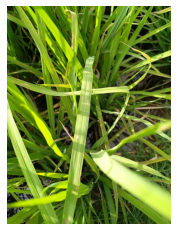

In [4]:
index = r.randint(0, len(os.listdir(TEST_BASE)))
path = os.path.join(TEST_BASE, os.listdir(TEST_BASE)[index])

image = get_image(path)
show_image(image)

### **CSV File Analysis**

In [5]:
df = pd.read_csv("../input/paddy-disease-classification/train.csv")
df.head(5)

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [6]:
assert len(os.listdir(TRAIN_BASE)) == len(set(df.label))

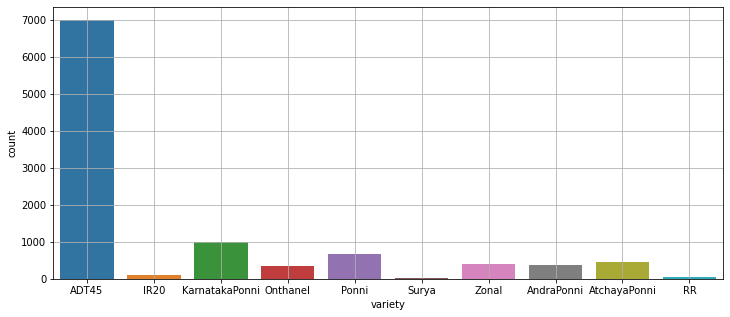

In [7]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="variety")
plt.grid()
plt.show()

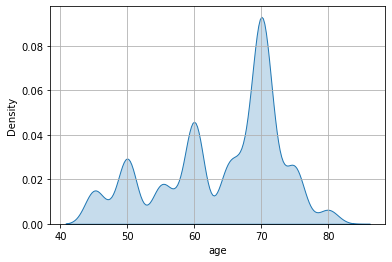

In [8]:
sns.kdeplot(data=df, x=df.age, shade=True)
plt.grid()
plt.show()

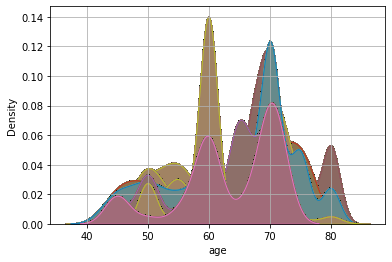

In [9]:
for label in df.label:
    sns.kdeplot(x=df[df.label ==label]["age"], shade=True, label=str(label))
plt.grid()
plt.show()

In [10]:
for label in set(df.label):
    print(f"{label:>24} - {df[df.label == label].shape[0]}")

                   blast - 1738
              brown_spot - 965
                   hispa - 1594
                  normal - 1764
            downy_mildew - 620
bacterial_panicle_blight - 337
   bacterial_leaf_blight - 479
              dead_heart - 1442
   bacterial_leaf_streak - 380
                  tungro - 1088
